In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

import os
from ultralytics import YOLO
import torch
import torch.nn.functional as F
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from torchmetrics.functional.detection.iou import intersection_over_union

from PIL import Image, ImageOps

import cv2

import multiprocessing as mp

import mlflow

from tqdm.auto import tqdm

from roboflow import Roboflow

In [2]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
GENERATOR = (
    torch.Generator(device=DEVICE) if torch.cuda.is_available() else torch.Generator()
)

In [3]:
model = YOLO(
    "/home/dmitry/elbrus/Phase2/ds-phase-2-git/runs/detect/train31/weights/best.pt"
)

In [19]:
results = model.predict(
    source="data/test_imgs/Johnnie2.JPG",
    conf=0.3,
    save=True,
)


image 1/1 /home/dmitry/elbrus/Phase2/ds-phase-2-git/week2/day2_yolo/data/test_imgs/Johnnie2.JPG: 608x480 2 Johnnies, 7.7ms
Speed: 9.4ms preprocess, 7.7ms inference, 0.6ms postprocess per image at shape (1, 3, 608, 480)
Results saved to /home/dmitry/elbrus/Phase2/ds-phase-2-git/runs/detect/predict4


In [11]:
results[0].show()

/usr/bin/eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


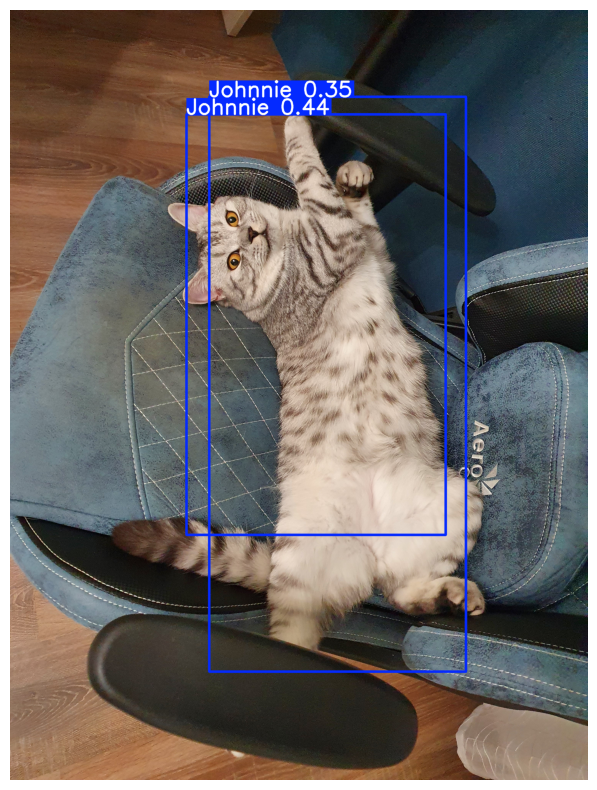

''

[tls @ 0x71368c041380] IO error: End of file
[https @ 0x5aa586760900] Stream ends prematurely at 0, should be 2929611
[ WARN:0@4671.730] global cap.cpp:164 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.10.0) /io/opencv/modules/videoio/src/cap_images.cpp:244: error: (-5:Bad argument) CAP_IMAGES: error, expected '0?[1-9][du]' pattern, got: https://s24vlx.storage.yandex.net/rdisk/171a8f976a63a5edee43546ea0efb9f3399bf602276d48b7f8642ceec8531163/68c996ef/fKqInKw3d7bLFOeFnMGnhIz6Rb_CeY9kQ9n8gK_euhCuTMZm9RSFbt0COfXnmqvOKXWyOA34JGKvpba5wIdHbBOQjyI662C9S1IoJdlS9H6r8npumZHI4midPdWhecNq?uid=1130000060687031&filename=2022-04-20%2021-38-26.JPG&disposition=inline&hash=&limit=0&content_type=image%2Fjpeg&owner_uid=1130000060687031&fsize=2929611&hid=cbfad2c61837627b356e991f3c2e30c5&media_type=image&tknv=v3&etag=5d7273273d51befb16621b97c6d14f6f&ts=63eee035059c0&s=af47eb8badf22cd9995eb9a87cdc382b771768a4772df889b193d2b516cb640d&pb=U2FsdGVkX1_e6tu6ZwPtOtGE9onb5EJclpPIq7QccurNBly5HV6uxYCkRWh-

In [20]:
img_path = results[0].plot()  # plot() возвращает numpy array с боксами
img_rgb = cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()
;

In [10]:
!which shotwell

/usr/bin/shotwell
